<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/master/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt


In [0]:
dfData = pd.read_csv("/content/cvstate20200314.tsv",
                     sep='\t', thousands=',')
#dfData.loc[(dfData.Date == 20200309) & (dfData.State=='WA'),['Negative']]= 1100
dfData.fillna(0, inplace=True)
dfData.Negative = dfData.Negative.astype('int64')
dfData.Positive = dfData.Positive.astype('int64')
dfData.Pending = dfData.Pending.astype('int64')
dfData.Total = dfData.Total.astype('int64')
dfData.Death = dfData.Death.astype('int64')

In [0]:
dfData.loc[(dfData.State=='CA')& (dfData.Date==20200313), ['Positive']]=247

In [168]:
res = dfData.loc[dfData.Date==20200310, ['Positive', 'Negative', 'Pending', 'Total']].sum()
print(res)
print(f"Current Infection Rate {res.Positive/res.Total*100:2f}%")

Positive     778
Negative    3807
Pending      469
Total       4889
dtype: int64
Current Infection Rate 15.913275%


In [169]:
dfData.dtypes



Date         int64
State       object
Positive     int64
Negative     int64
Pending      int64
Death        int64
Total        int64
dtype: object

In [170]:
dfData.index

RangeIndex(start=0, stop=482, step=1)

In [171]:
dfData.describe()

,Date,Positive,Negative,Pending,Death,Total
count,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000
mean,2.020031e+07,19.547718,123.348548,12.636929,0.313278,155.014523
std,2.840522e+00,57.931270,435.429531,32.741204,2.805435,489.850028
min,2.020030e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020031e+07,1.000000,5.000000,0.000000,0.000000,10.000000
50%,2.020031e+07,3.000000,31.000000,0.000000,0.000000,43.500000
75%,2.020031e+07,12.000000,91.750000,9.000000,0.000000,121.750000
max,2.020031e+07,568.000000,6001.000000,236.000000,37.000000,6569.000000


In [172]:
dfData.loc[:, ['State', 'Positive']].sort_values(by='Positive')

,State,Positive
348,AR,0
280,MS,0
281,MT,0
283,ND,0
287,NM,0
...,...,...
149,WA,337
85,NY,421
98,WA,457
34,NY,524


In [173]:
dfData[(dfData.Positive >0) & (dfData.Date==20200309)].sort_values(by='Positive').Date.count()

37

In [0]:
dfPositive= dfData[dfData.Positive>0]

In [0]:
dfCA = dfPositive[dfPositive.State=='CA']

In [176]:
arCols = ['Positive', 'Negative', 'Death']
arTotCols= ['Positive', 'Negative']

dfUSA0311 = dfData.loc[dfData.Date == 20200311, arCols].sum()
print(dfUSA0311)
print(dfUSA0311.loc[arTotCols].sum())
dfUSA0313 = dfData.loc[dfData.Date == 20200313, arCols].sum()
print(dfUSA0313)
print(dfUSA0313.loc[arTotCols].sum())


Positive    1053
Negative    5978
Death         27
dtype: int64
7031
Positive     1967
Negative    13513
Death          39
dtype: int64
15480


In [0]:
gb = dfData.groupby(['Date'])

In [0]:
dfTest = gb.Positive.sum().reset_index().copy()

In [0]:
dfTest['PCT']= dfTest.Positive/2450

In [180]:
dfTest

,Date,Positive,PCT
0,20200304,118,0.048163
1,20200305,176,0.071837
2,20200306,223,0.091020
3,20200307,341,0.139184
4,20200308,417,0.170204
5,20200309,584,0.238367
6,20200310,778,0.317551
7,20200311,1053,0.429796
8,20200312,1315,0.536735
9,20200313,1967,0.802857


In [0]:
gca = dfData[dfData.State=='CA'].groupby(['Date']).Positive.sum().reset_index().copy()

In [0]:
gca['PCT']=gca.Positive/252

In [183]:
gca

,Date,Positive,PCT
0,20200304,53,0.210317
1,20200305,53,0.210317
2,20200306,60,0.238095
3,20200307,69,0.273810
4,20200308,88,0.349206
5,20200309,114,0.452381
6,20200310,133,0.527778
7,20200311,157,0.623016
8,20200312,202,0.801587
9,20200313,247,0.980159


In [0]:
dfCA0311 = dfCA.loc[dfCA.Date == 20200311, ['Positive', 'Death']].sum()
dfCA0313 = dfCA.loc[dfCA.Date == 20200313, ['Positive', 'Death']].sum()

In [0]:
 usaRate = (dfUSA0313.Positive-dfUSA0311.Positive)/dfUSA0311.Positive
 caRate = (dfCA0313.Positive - dfCA0311.Positive)/dfCA0311.Positive

In [186]:
print(usaRate, caRate)

0.8679962013295347 0.5732484076433121


In [187]:
dfCA0313.Positive-dfCA0311.Positive


90

In [0]:
df2 = dfPositive.State.unique()

In [189]:
df2

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WY'], dtype=object)

In [0]:
df1 = dfPositive[dfPositive.Date == 20200308].State
df2 = dfPositive[dfPositive.Date == 20200309].State

In [191]:
print(df1.count())
print(df2.count())

34
37


In [192]:
dfData.Pending

0       0
1      46
2      26
3      50
4       0
       ..
477    18
478     0
479     0
480     0
481     6
Name: Pending, Length: 482, dtype: int64

In [0]:
dfByDate = dfData.groupby(by='Date').sum()

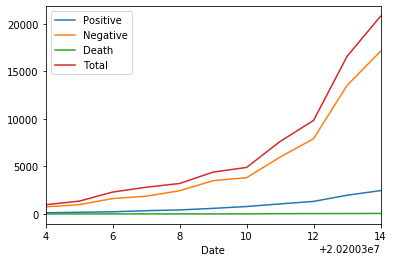

In [194]:
dfByDate.loc[:, ['Positive', 'Negative','Death','Total']].plot.line()

In [195]:
dfByDate

,Positive,Negative,Pending,Death,Total
Date,,,,,
20200304,118,748,103,0,969
20200305,176,971,197,0,1344
20200306,223,1617,458,0,2298
20200307,341,1863,602,0,2806
20200308,417,2437,347,0,3201
20200309,584,3500,313,0,4397
20200310,778,3807,469,0,4889
20200311,1053,5978,563,27,7617
20200312,1315,7913,673,36,9836


In [0]:
dfWHO = pd.read_csv("/content/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
dfWHO.rename(columns={'Deaths': 'who_Deaths'}, inplace=True)

In [198]:
dfWHO.tail()



,Confirmed,who_Deaths
Date,,
20200310,472,19
20200311,696,25
20200312,987,29
20200313,1264,36
20200314,1678,41


In [199]:
dfWHO


,Confirmed,who_Deaths
Date,,
20200304,108,6
20200305,129,9
20200306,148,10
20200307,213,11
20200308,213,11
20200309,213,11
20200310,472,19
20200311,696,25
20200312,987,29


In [0]:
dfResults = dfByDate.join(dfWHO, how='left', rsuffix='_who' )

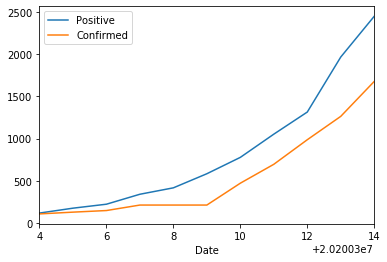

In [201]:
dfResults.loc[:, ['Positive', 'Confirmed']].plot.line()

In [202]:
dfData[dfData.State=='CA'].sort_values(by='Date')

,Date,State,Positive,Negative,Pending,Death,Total
469,20200304,CA,53,462,0,0,515
445,20200305,CA,53,462,0,0,515
409,20200306,CA,60,462,0,0,522
359,20200307,CA,69,462,0,0,531
308,20200308,CA,88,462,0,0,550
259,20200309,CA,114,690,0,0,804
208,20200310,CA,133,690,0,0,823
157,20200311,CA,157,916,0,0,1073
106,20200312,CA,202,916,0,4,1118
55,20200313,CA,247,916,0,4,1118


In [203]:
dfResults

,Positive,Negative,Pending,Death,Total,Confirmed,who_Deaths
Date,,,,,,,
20200304,118,748,103,0,969,108,6
20200305,176,971,197,0,1344,129,9
20200306,223,1617,458,0,2298,148,10
20200307,341,1863,602,0,2806,213,11
20200308,417,2437,347,0,3201,213,11
20200309,584,3500,313,0,4397,213,11
20200310,778,3807,469,0,4889,472,19
20200311,1053,5978,563,27,7617,696,25
20200312,1315,7913,673,36,9836,987,29


In [204]:
157-198


-41

In [205]:
columns = ['State','Country','LastUpdate','Confirmed','Deaths','Recovered', 'Lat','Long']
dfTest = pd.read_csv("/content/03-12-2020.csv",header=0, names=columns)

FileNotFoundError: ignored

In [0]:
dfTest.dtypes

In [0]:
dfUSA = dfTest[dfTest.Country=='US']

In [0]:
dfUSA

In [0]:
dfUSA.loc[:,['Confirmed', 'Deaths']].sum()

In [0]:
dfUSA[dfUSA.Confirmed>0]

In [0]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-12-2020.csv --quiet --output-document ./sample_data/20200312.csv

In [0]:
dfJHUData = pd.read_csv('./sample_data/20200312.csv', header=0,
                        names=['State', 'Country', 'LastUpdate',
                               'Confirmed', 'Dead', 'Recovered', 'Lat','Lon'])

In [0]:
dfJHUData[dfJHUData.Country=='US'][['Confirmed', 'Dead']].sum()

In [0]:
dfJHUData = pd.read_csv('./sample_data/20200312.csv')

In [0]:
dfJHUData.columns

In [0]:
dfJHUData.head()